In [61]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
from sklearn.metrics import accuracy_score


In [62]:
# reading csv file
df=pd.read_csv("coffee_data.csv")
df.head()

,record,status_r1,status_r2,status_r3,status_r4,QDevice_r1,QDevice_r2,QDevice_r3,S1_r1,S1_r2,...,Q22_r16,Q22_r17,Q22_r18,Q22_r19,Q22_r20,Q22_r21,Q22_r22,Q22_r23,Oversample_r1,Oversample_r2
0,23,0,0,1,0,0,1,0,1,0,...,1,1,1,1,1,1,1,1,1,0
1,8,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,1,0
2,54,0,0,1,0,0,1,0,1,0,...,0,1,0,1,1,1,1,0,1,0
3,19,0,0,1,0,0,1,0,1,0,...,1,1,1,1,0,1,1,0,1,0
4,64,0,0,1,0,0,1,0,0,1,...,1,1,1,0,1,1,1,1,1,0


In [63]:
#dropping record+status columns
df.drop(df.iloc[:,0:5], inplace=True, axis=1)


#dropping (use MRK_Age)
df.drop(df.iloc[:,5:11], inplace=True, axis=1)


#dropping S4 columns
df.drop(df.iloc[:,14:65], inplace=True, axis=1)

#drooping state divison 
df.drop(df.iloc[:,18:27], inplace=True, axis=1)


#dropping Q5
df.drop(df.iloc[:,68:70], inplace=True, axis=1)


In [68]:
df.head()

,QDevice_r1,QDevice_r2,QDevice_r3,S1_r1,S1_r2,MRK_Age2_r1,MRK_Age2_r2,MRK_Age2_r3,S3_r1,S3_r2,...,Q22_r16,Q22_r17,Q22_r18,Q22_r19,Q22_r20,Q22_r21,Q22_r22,Q22_r23,Oversample_r1,Oversample_r2
0,0,1,0,1,0,0,1,0,1,0,...,1,1,1,1,1,1,1,1,1,0
1,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,0,1,0,1,0,0,1,0,1,0,...,0,1,0,1,1,1,1,0,1,0
3,0,1,0,1,0,0,1,0,1,0,...,1,1,1,1,0,1,1,0,1,0
4,0,1,0,0,1,0,0,1,0,0,...,1,1,1,0,1,1,1,1,1,0


In [11]:
list(df.columns)

['QDevice_r1',
 'QDevice_r2',
 'QDevice_r3',
 'S1_r1',
 'S1_r2',
 'MRK_Age2_r1',
 'MRK_Age2_r2',
 'MRK_Age2_r3',
 'S3_r1',
 'S3_r2',
 'S3_r3',
 'S3_r4',
 'S3_r5',
 'S3_r6',
 'Region_r1',
 'Region_r2',
 'Region_r3',
 'Region_r4',
 'S5_r1',
 'S5_r2',
 'S5_r3',
 'S5_r4',
 'S5_r5',
 'S5_r6',
 'S5_r7',
 'Q23_r1',
 'Q23_r2',
 'Q23_r3',
 'Q23_r4',
 'Q23_r5',
 'Q24_r1',
 'Q24_r2',
 'Q24_r3',
 'Q25_r1',
 'Q25_r2',
 'Q25_r3',
 'Q26_r1',
 'Q26_r2',
 'Q26_r3',
 'Q26_r4',
 'Q27_r1',
 'Q27_r2',
 'Q27_r3',
 'Q27_r4',
 'Q2_C1_r1',
 'Q2_C1_r2',
 'Q2_C1_r3',
 'Q2_C1_r4',
 'Q2_C1_r5',
 'Q2_C1_r6',
 'Q2_C1_r7',
 'Q2_C1_r8',
 'Q2_C2_r1',
 'Q2_C2_r2',
 'Q2_C2_r3',
 'Q2_C2_r4',
 'Q2_C2_r5',
 'Q2_C2_r6',
 'Q2_C2_r7',
 'Q2_C2_r8',
 'Q2_C3_r1',
 'Q2_C3_r2',
 'Q2_C3_r3',
 'Q2_C3_r4',
 'Q2_C3_r5',
 'Q2_C3_r6',
 'Q2_C3_r7',
 'Q2_C3_r8',
 'Q4_r1',
 'Q4_r2',
 'Q6_r1',
 'Q6_r2',
 'Q8_r1',
 'Q8_r2',
 'Q8_r3',
 'Q8_r4',
 'Q9_r1',
 'Q9_r2',
 'Q9_r3',
 'Q10_r1',
 'Q10_r2',
 'Q10_r3',
 'Q10_r4',
 'Q10_r5',
 'Q10_r6',
 'Q1

In [70]:
df = df.replace([np.inf, -np.inf], np.nan)
df.isnull().sum().sort_values()

QDevice_r1    0
Q13_r7        0
Q13_r8        0
Q13_r9        0
Q13_r10       0
             ..
Q18_r10       2
Q18_r6        2
Q18_r7        2
Q18_r9        2
Q18_r5        2
Length: 267, dtype: int64

In [71]:
df = df.dropna()
df = df.reset_index(drop=True)

In [72]:
#preparing columns for the traing 
aa = ['Q11_r1',
'Q11_r2',
'Q11_r3',
'Q11_r4',
'Q11_r5',
'Q11_r6',
'Q11_r7',
'Q11_r8',
'Q11_r9',
'Q11_r10',
'Q11_r11',
'Q11_r12',
'Q11_r13'] 
aa = [ i for i in aa if i in df.columns]

In [73]:
X = df.drop(aa, axis=1)
cols=['Q11_r1',
'Q11_r2',
'Q11_r3',
'Q11_r4',
'Q11_r5',
'Q11_r6',
'Q11_r7',
'Q11_r8',
'Q11_r9',
'Q11_r10',
'Q11_r11',
'Q11_r12',
'Q11_r13']

cols = [i for i in cols if i in aa]
y=df[cols]


In [74]:
y.sum()

Q11_r1      43
Q11_r2       7
Q11_r3      60
Q11_r4     429
Q11_r5     313
Q11_r6     229
Q11_r7     609
Q11_r8     147
Q11_r9     704
Q11_r10    123
Q11_r11      5
Q11_r12    364
Q11_r13      0
dtype: int64

In [75]:
#using random forest for the model 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [76]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=25,
#                                        max_depth=10,
                                       random_state=1)

In [77]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=1)

In [78]:
y_predict = random_forest.predict(X_train)
accuracy_score(y_train, y_predict)

0.9815303430079155

In [79]:
#checking accuracy score
from sklearn.metrics import accuracy_score
y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.04479578392621871

In [80]:
# view the feature scores

feature_scores = pd.Series(random_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
res=feature_scores.head(10)
res

Q19_r2     0.027995
Q19_r1     0.017832
Q9_r3      0.010904
Q9_r2      0.010698
Q13_r21    0.008698
Q12_r6     0.007865
Q21_r1     0.007402
Q13_r10    0.007042
Q12_r7     0.006779
Q12_r16    0.006524
dtype: float64

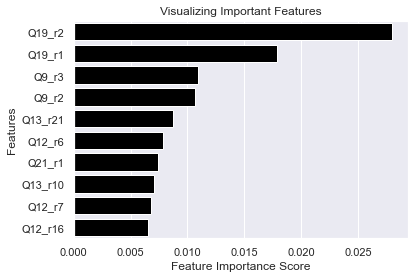

In [81]:

sns.barplot(x=feature_scores.head(10), y=feature_scores.head(10).index,color='black')
# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")
# Visualize the graph

plt.show()

In [82]:
#finding the correlation for future insights by making the new dataframe
new_df = df[['Q11_r1', 'Q11_r2', 'Q11_r3', 'Q11_r4',
'Q11_r5', 'Q11_r6', 'Q11_r7', 'Q11_r8', 'Q11_r9', 'Q11_r10', 'Q11_r11',
'Q11_r12','Q19_r2',
'Q19_r1',
'Q9_r3',
'Q9_r2',
'Q13_r21',
'Q12_r6',
'Q21_r1',
'Q13_r10',
'Q12_r7',
'Q12_r16']].copy()
 

<AxesSubplot:>

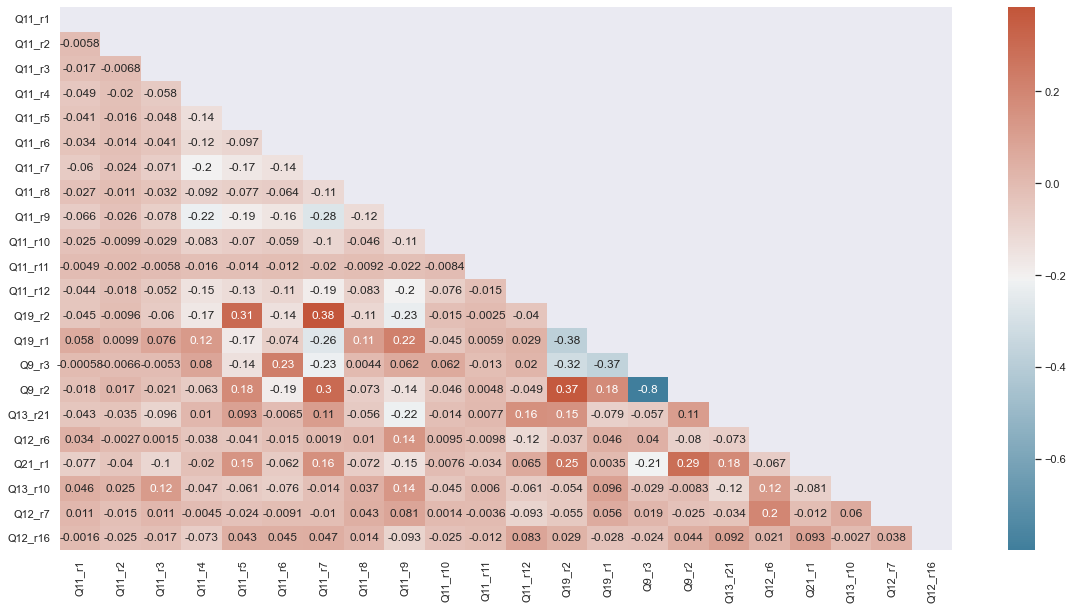

In [83]:
new_df
#
# Correlation between different variables
#
corr = new_df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(20, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [84]:
#checking the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        13
           3       1.00      0.01      0.02       107
           4       0.00      0.00      0.00        80
           5       0.00      0.00      0.00        60
           6       0.52      0.16      0.24       146
           7       0.00      0.00      0.00        34
           8       0.71      0.05      0.10       183
           9       0.00      0.00      0.00        29
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00        96
          12       0.00      0.00      0.00         0

   micro avg       0.57      0.04      0.08       759
   macro avg       0.17      0.02      0.03       759
weighted avg       0.41      0.04      0.07       759
 samples avg       0.04      0.04      0.04       759



C:\Users\Vijaya rana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vijaya rana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vijaya rana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
